In [1]:
import pandas as pd

df = pd.read_csv('BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()

In [2]:
# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


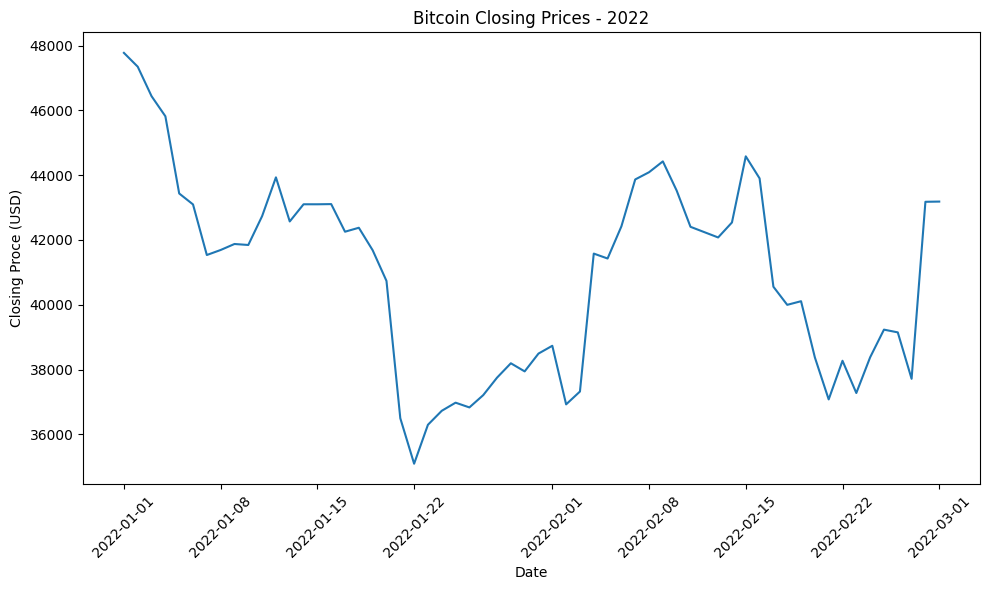

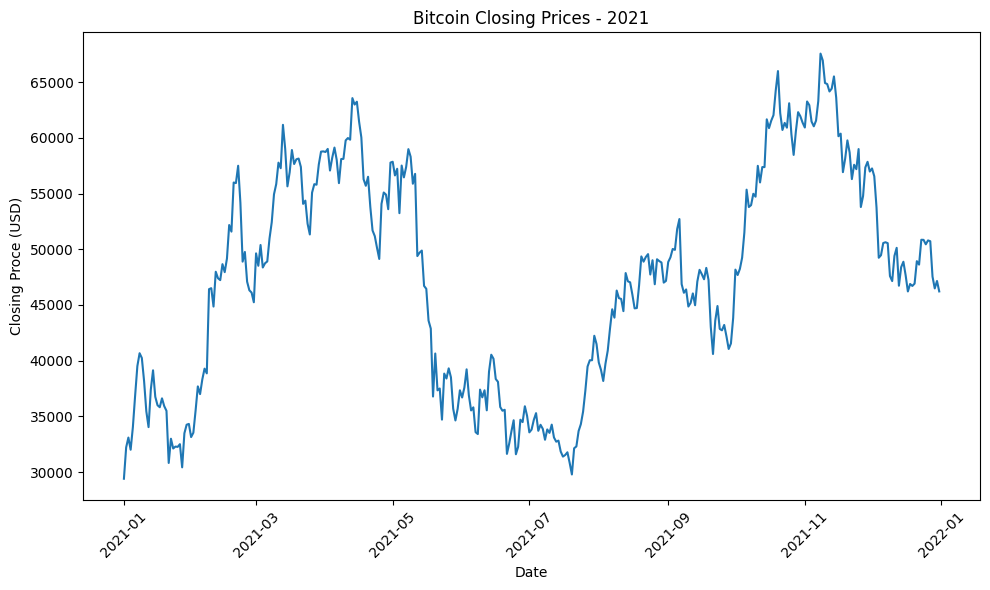

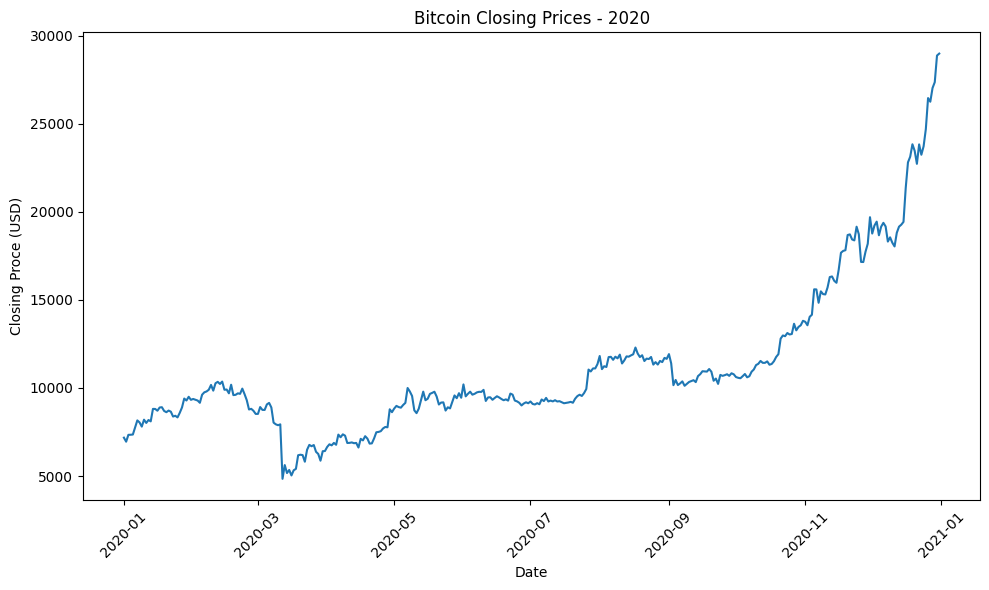

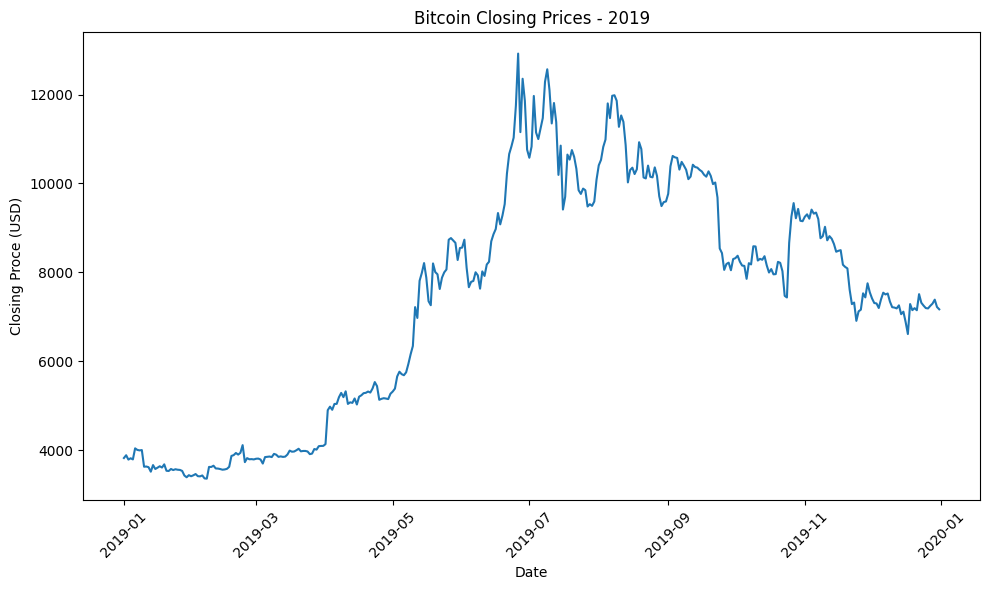

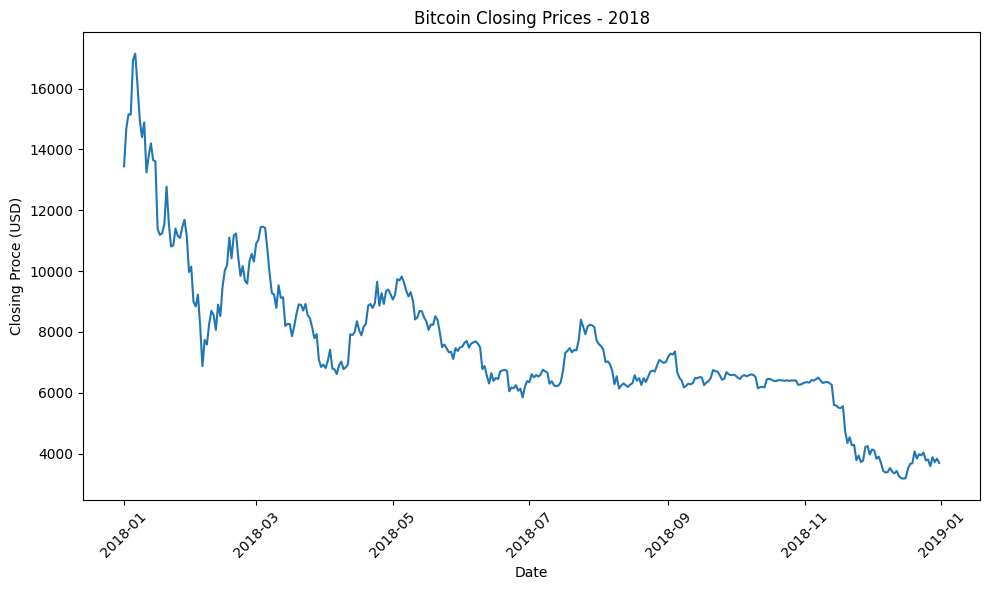

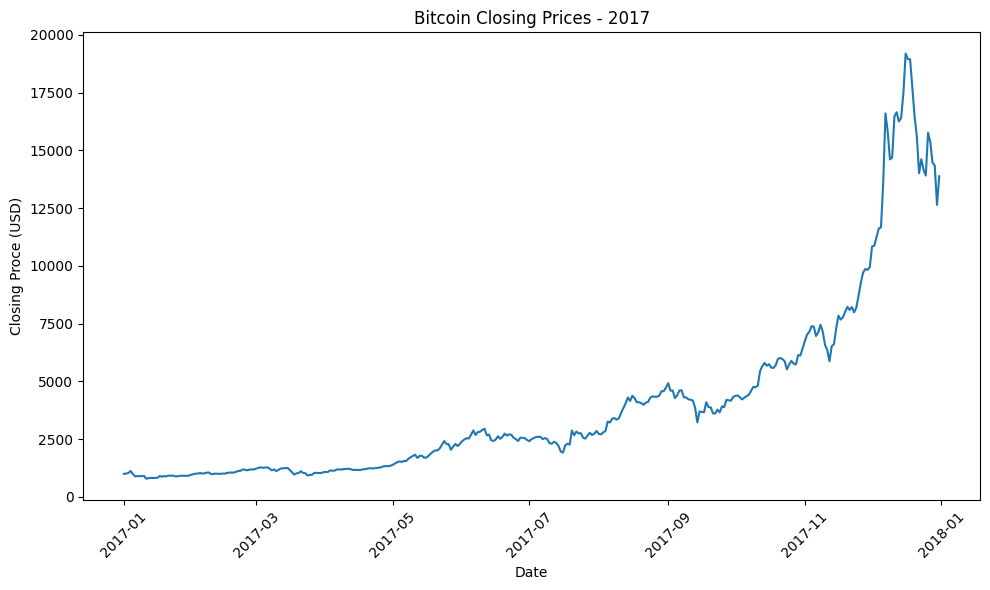

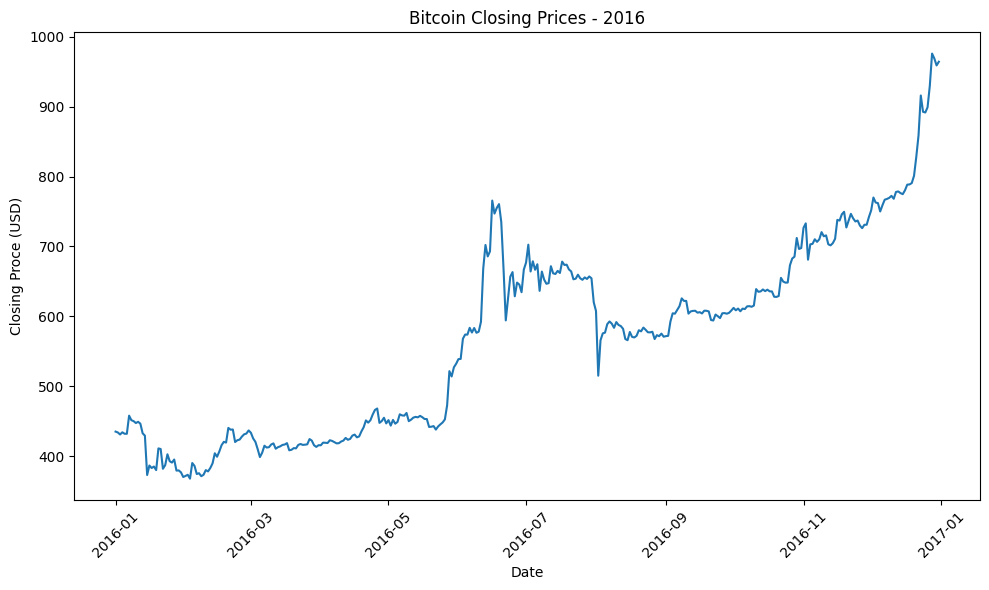

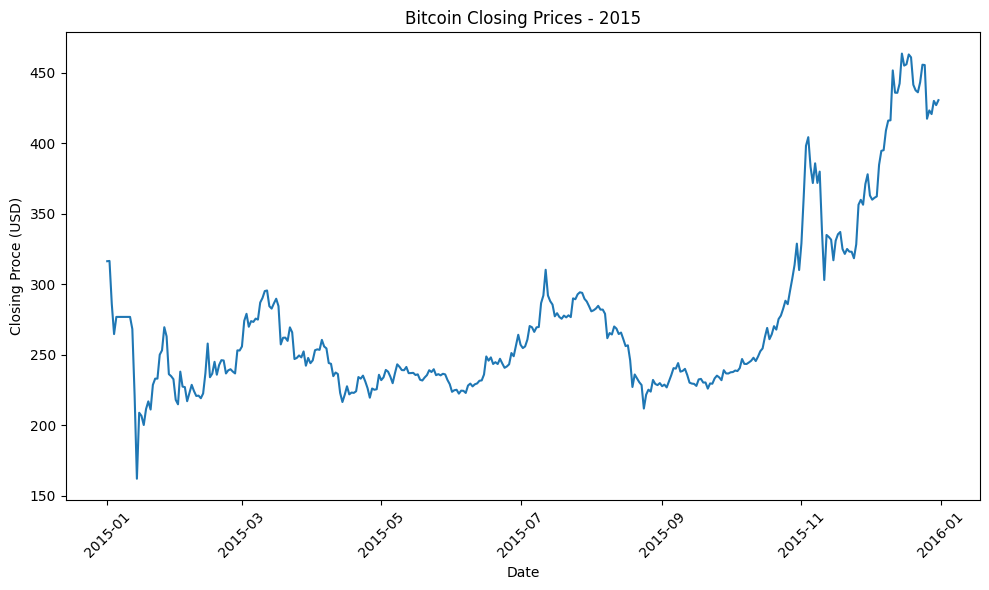

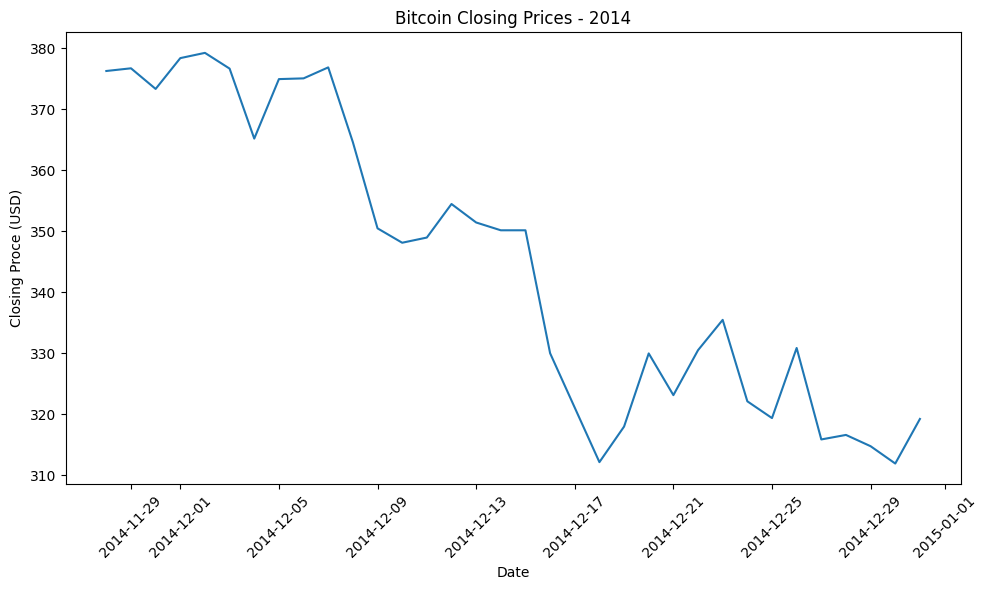

In [3]:
import matplotlib.pyplot as plt
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()
for year in unique_years:

    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day
    merged_data = pd.merge(year_month_day, df, on=['year', 'month','day'], how = 'left')
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Proce (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\lurke\AppData\Local\Temp\ipykernel_24468\2669108850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


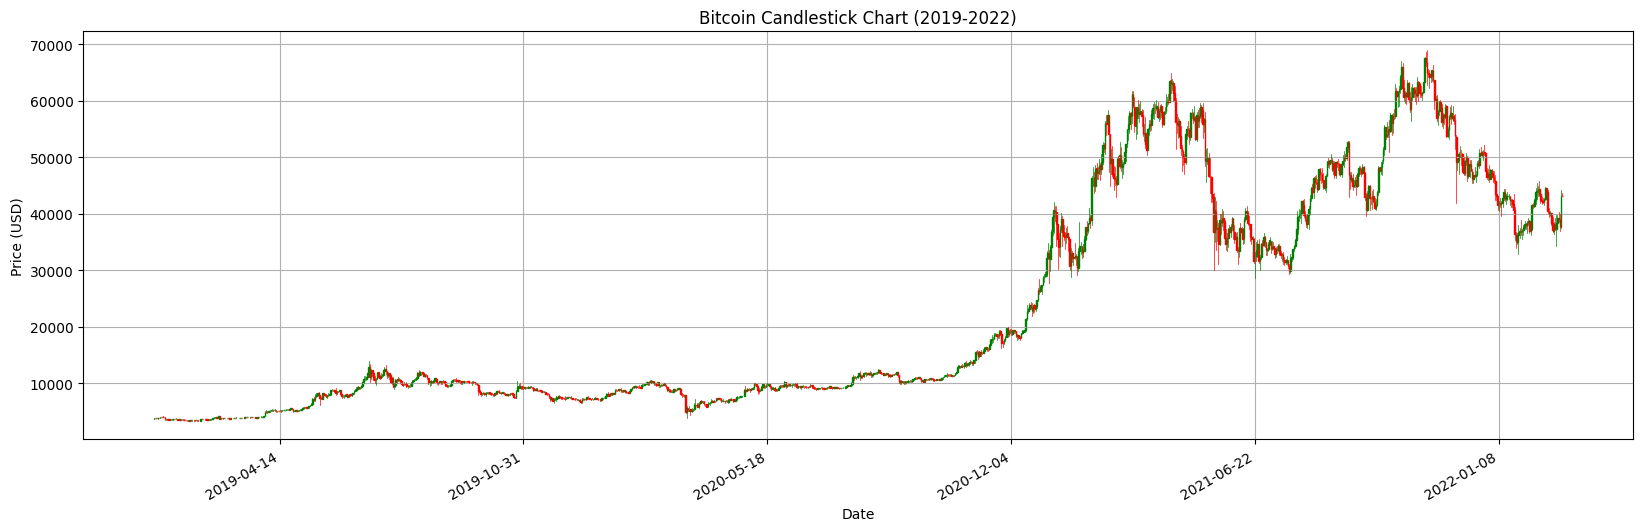

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()


In [5]:
import numpy as np
def predict(X, w, b):
    return X.dot(w) + b
def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw, db, cost)
def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["Standardized_Close_Prices"] = scaler.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scaler.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scaler.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scaler.fit_transform(df["low"].values.reshape(-1,1))


In [7]:
df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

df['NumericalDate'] = pd.to_numeric(df['date_str'])

df.drop(columns=['date_str'], inplace=True)
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day,Standardized_Close_Prices,Standardized_Open_Prices,Standardized_High_Prices,Standardized_Low_Prices,NumericalDate
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,2022,3,1,1.933444,1.937893,1.887415,2.029161,20220301000000
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,2022,2,28,1.933045,1.599553,1.925034,1.665409,20220228000000
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,2022,2,27,1.597274,1.687421,1.663971,1.636567,20220227000000
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,2022,2,26,1.685357,1.693320,1.690505,1.737377,20220226000000
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,2022,2,25,1.690577,1.639126,1.654474,1.700955,20220225000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2014,12,2,-0.695958,-0.695461,-0.696442,-0.694946,20141202000000
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,2014,12,1,-0.696010,-0.695584,-0.696475,-0.695086,20141201000000
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,2014,11,30,-0.696321,-0.695573,-0.696494,-0.695068,20141130000000
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,2014,11,29,-0.696113,-0.695583,-0.696218,-0.695136,20141129000000


In [8]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae


X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, shuffle = True)


In [9]:
def linear_regression_vectorized(X, y, learning_rate = 0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []
    for _ in range(num_iterations):
        y_hat = predict(X, w ,b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)
    return w, b, losses

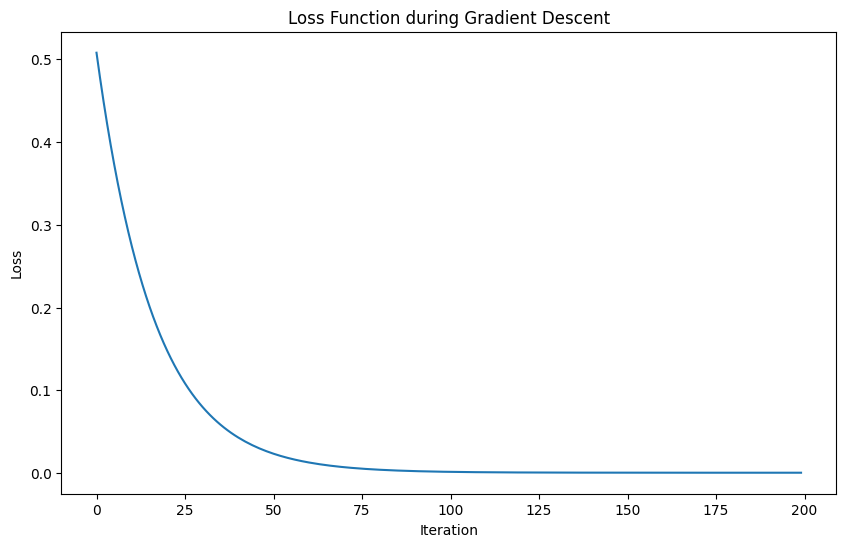

In [10]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# b = 0
# w = np.zeros(X_train.shape[1])
# lr = 0.01
# epochs = 200

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()

In [11]:
from sklearn.metrics import r2_score

y_pred = predict(X_test, w, b)

rmse = np.sqrt(np.mean((y_pred - y_test)**2))

mae = np.mean(np.abs(y_pred - y_test))

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_pred)

print(" Root Mean Square Error ( RMSE ):", round(rmse , 4))
print(" Mean Absolute Error ( MAE):", round(mae , 4))
print(" Training Accuracy (R- squared ):", round(train_accuracy , 4))
print(" Testing Accuracy (R- squared ):", round(test_accuracy , 4))


 Root Mean Square Error ( RMSE ): 0.0293
 Mean Absolute Error ( MAE): 0.0138
 Training Accuracy (R- squared ): 0.9989
 Testing Accuracy (R- squared ): 0.9991


C:\Users\lurke\AppData\Local\Temp\ipykernel_24468\2527202224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['predicted_close'] = df_2015['close'].shift(1)


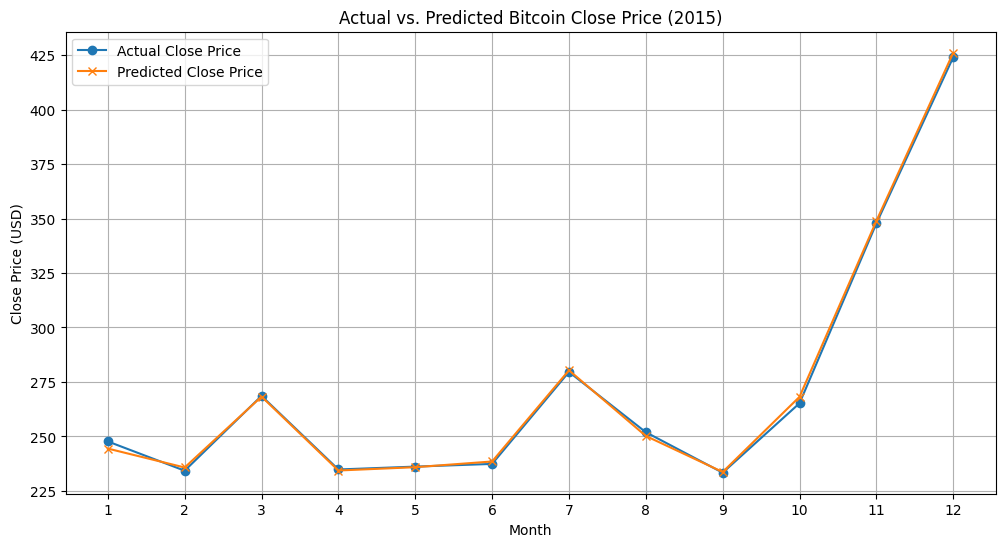

In [12]:
# Filter data for 2015
df_2015 = df[df['date'].dt.year == 2015]

# Group by month and get the mean of the actual and predicted close prices
monthly_actual = df_2015.groupby(df_2015['date'].dt.month)['close'].mean()

# Assuming you have a way to predict the close prices for 2015 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2015['predicted_close'] = df_2015['close'].shift(1)
monthly_predicted = df_2015.groupby(df_2015['date'].dt.month)['predicted_close'].mean()


# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_actual.index, monthly_actual.values, label='Actual Close Price', marker='o')
plt.plot(monthly_predicted.index, monthly_predicted.values, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (2015)')
plt.xlabel('Month')
plt.ylabel('Close Price (USD)')
plt.xticks(monthly_actual.index)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\lurke\AppData\Local\Temp\ipykernel_24468\1590446279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


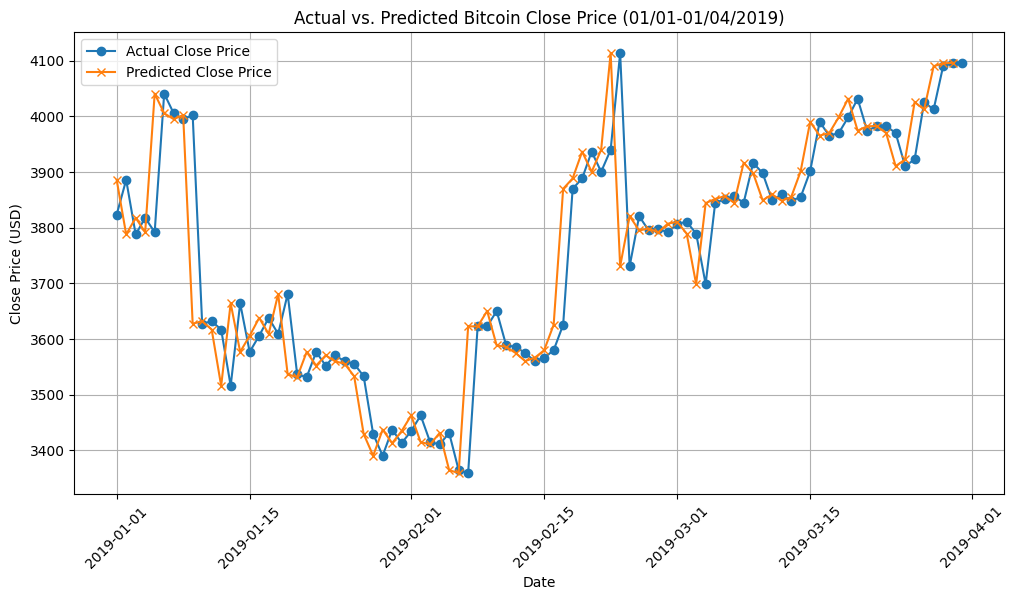

In [13]:
# Filter data for 2019-01-01 to 2019-03-31
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

# Assuming you have a way to predict the close prices for 2019-01-01 to 2019-03-31 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
